In this notebook, we'll begin exploring the multi-modal datasets that we'll use for developing the multi-modal integration method. 

Details of both of these datasets are available at https://openproblems.bio/neurips_docs/data/dataset/. Details on multi-modal single-cell data in general can be found here https://openproblems.bio/neurips_docs/data/about_multimodal/.

The data is completely preprocessed and contains the necessary annotations for benchmarking integration methods. We'll start by looking at the first dataset, and we'll start our method development on this dataset as well. Eventually, if time permits, we can incorporate the second dataset.

Let's start by loading some necessary libraries:

In [1]:
import os

import numpy as np
import pandas as pd
import scanpy as sc 
import anndata as ann

The "multi-ome" dataset (first dataset) has simulatenously measured chromatin accessibility (https://en.wikipedia.org/wiki/ATAC-seq#Single-cell_ATAC-seq) and gene expression (https://en.wikipedia.org/wiki/Single-cell_transcriptomics) across single-cells from multiple donors and sites (details in link at the start of notebook). Let's go ahead and load the data, which is in h5ad format:

In [2]:
os.chdir("..")
multiome = sc.read_h5ad("data/multimodal/GSE194122_openproblems_neurips2021_multiome_BMMC_processed.h5ad")

Let's examine the .obs (cell-level features) and .var (gene-level features) of the data 

In [3]:
multiome.obs

,GEX_pct_counts_mt,GEX_n_counts,GEX_n_genes,GEX_size_factors,GEX_phase,ATAC_nCount_peaks,ATAC_atac_fragments,ATAC_reads_in_peaks_frac,ATAC_blacklist_fraction,ATAC_nucleosome_signal,...,VendorLot,DonorID,DonorAge,DonorBMI,DonorBloodType,DonorRace,Ethnicity,DonorGender,QCMeds,DonorSmoker
TAGTTGTCACCCTCAC-1-s1d1,1.061008,1508.0,1022,0.453484,S,4031.0,5400,0.746481,0.003473,0.642468,...,3054455,15078,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker
CTATGGCCATAACGGG-1-s1d1,0.604230,1655.0,1081,0.455631,G2M,8636.0,19266,0.448251,0.003126,1.220679,...,3054455,15078,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker
CCGCACACAGGTTAAA-1-s1d1,0.650069,7230.0,3304,2.435348,G2M,4674.0,6177,0.756678,0.001284,0.692573,...,3054455,15078,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker
TCATTTGGTAATGGAA-1-s1d1,0.812274,1108.0,793,0.347226,G2M,2803.0,4019,0.697437,0.000714,0.633838,...,3054455,15078,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker
ACCACATAGGTGTCCA-1-s1d1,1.674770,1851.0,1219,0.534205,G2M,1790.0,2568,0.697040,0.003352,0.727660,...,3054455,15078,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AAACCGCGTTTGAGGC-12-s4d9,2.777778,504.0,414,0.423378,G2M,10551.0,9280,1.136961,0.000000,0.746048,...,3061608,13272,35,31.0,O+,Other Race,HISPANIC OR LATINO,Male,False,Nonsmoker
TGACTTAAGTTCCCGT-12-s4d9,1.199400,667.0,506,0.540696,S,13055.0,11980,1.089733,0.001379,0.609774,...,3061608,13272,35,31.0,O+,Other Race,HISPANIC OR LATINO,Male,False,Nonsmoker
GCTGTACCACCGTTCC-12-s4d9,7.535642,491.0,395,0.434772,G2M,9689.0,7968,1.215989,0.001342,0.491691,...,3061608,13272,35,31.0,O+,Other Race,HISPANIC OR LATINO,Male,False,Nonsmoker
ACACTTGCAACTAGAA-12-s4d9,2.666667,900.0,675,0.794887,S,21123.0,23886,0.884326,0.001846,0.851667,...,3061608,13272,35,31.0,O+,Other Race,HISPANIC OR LATINO,Male,False,Nonsmoker


In [4]:
multiome.var

,feature_types,gene_id
AL627309.5,GEX,ENSG00000241860
LINC01409,GEX,ENSG00000237491
LINC01128,GEX,ENSG00000228794
NOC2L,GEX,ENSG00000188976
KLHL17,GEX,ENSG00000187961
...,...,...
GL000219.1-90062-90937,ATAC,NaN
GL000219.1-99257-100160,ATAC,NaN
KI270726.1-27152-28034,ATAC,NaN
KI270713.1-21434-22336,ATAC,NaN


As we can see from .var, there are two feature-types - GEX and ATAC, which refer to gene expression and chromatin accessibility, respectively. The gene expression values have a gene-id and name attached to them, because we're measuring expression of individual genes. Whereas the chromatin accessibility features don't have gene ids. This is because any region of the genome, whether it codes for a gene or not, can be accessibile. These accessible regions are aggregated into "peaks" of accessibility, which are then defined as features. If you want to read more about processing ATAC-seq data, you can do so here: https://genomebiology.biomedcentral.com/articles/10.1186/s13059-020-1929-3

From the .obs attribute, we can see we have metadata associated with each cell for the two modalities. We also have donor information. Let's see all of the columns for the metadata and pick out the classes 

In [5]:
print(multiome.obs.columns)

Index(['GEX_pct_counts_mt', 'GEX_n_counts', 'GEX_n_genes', 'GEX_size_factors',
       'GEX_phase', 'ATAC_nCount_peaks', 'ATAC_atac_fragments',
       'ATAC_reads_in_peaks_frac', 'ATAC_blacklist_fraction',
       'ATAC_nucleosome_signal', 'cell_type', 'batch', 'ATAC_pseudotime_order',
       'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality',
       'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType',
       'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker'],
      dtype='object')


In [6]:
multiome.obs.cell_type

TAGTTGTCACCCTCAC-1-s1d1     Naive CD20+ B
CTATGGCCATAACGGG-1-s1d1        CD14+ Mono
CCGCACACAGGTTAAA-1-s1d1            CD8+ T
TCATTTGGTAATGGAA-1-s1d1            CD8+ T
ACCACATAGGTGTCCA-1-s1d1        CD16+ Mono
                                ...      
AAACCGCGTTTGAGGC-12-s4d9     CD8+ T naive
TGACTTAAGTTCCCGT-12-s4d9       Lymph prog
GCTGTACCACCGTTCC-12-s4d9           CD8+ T
ACACTTGCAACTAGAA-12-s4d9             cDC2
CACTTAAAGTCTGGGC-12-s4d9    Naive CD20+ B
Name: cell_type, Length: 69249, dtype: category
Categories (22, object): ['B1 B', 'CD4+ T activated', 'CD4+ T naive', 'CD8+ T', ..., 'Proerythroblast', 'Transitional B', 'cDC2', 'pDC']

There we go, that's what we're aiming for. We want our embeddings that we create from **both of these modalities**, across donors and samples, to reflect these classes. 

We'll do this in an **unsupervised fashion**, meaning we won't use these labels during our model training. We'll assess how well our embeddings (which can be anywhere from 10-100 dimensions per cell) correspond to these classes by performing unsupervised clustering on our embeddings, and then comparing those partitions with ground-truth classes using metrics such as the ARI, AMI, Completeness, and Homogeneity (coming up in the next notebook! - sneak peak here https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation).

We know that the **.X** attribute is supposed to store the counts, but we have two modalities now. Data for both of them will be stored in .X. To subset .X for each individual modality, we can use the .var frame object in the following way:

In [7]:
gex_X = multiome.X[:, multiome.var["feature_types"] == "GEX"]
gex_X.shape

(69249, 13431)

In [8]:
ATAC_X = multiome.X[:, multiome.var["feature_types"] == "ATAC"]
ATAC_X.shape

(69249, 116490)

From here, we can see that we have about 13k features for gene-expression and >110k for chromatin accessibility! This is a lot, and one of the major challenges will be to determine how to deal with this very high dimensional data. 

We know we have samples from multiple donors and sites - let's check the **RNA data only** to see if there are technical effects. We'll follow the exact workflow from **Notebook 01**, with the exception that the counts now are already **normalized and log1p transformed**, so we'll skip those steps. 

In [9]:
# Perform preprocessing steps to obtain umap representation of RNA data 
gex = multiome[:, multiome.var["feature_types"] == "GEX"] # Subset all data, not just the counts 
sc.pp.highly_variable_genes(gex, n_top_genes=2500, flavor="seurat_v3") # Feature selection
sc.pp.pca(gex, n_comps=20) # Perform PCA reduction of the data
sc.pp.neighbors(gex, n_neighbors=15) # Get the neighborhood graph of the PCA space
sc.tl.umap(gex) # Use the neighborhood graph to get the UMAP coordinates

/h/hmaan/miniconda3/envs/single_cell_env/lib/python3.7/site-packages/scanpy/preprocessing/_highly_variable_genes.py:64: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  UserWarning,
Trying to set attribute `._uns` of view, copying.


Let's look at how the cell-type and batch (donor/site) embeddings look in this data now 

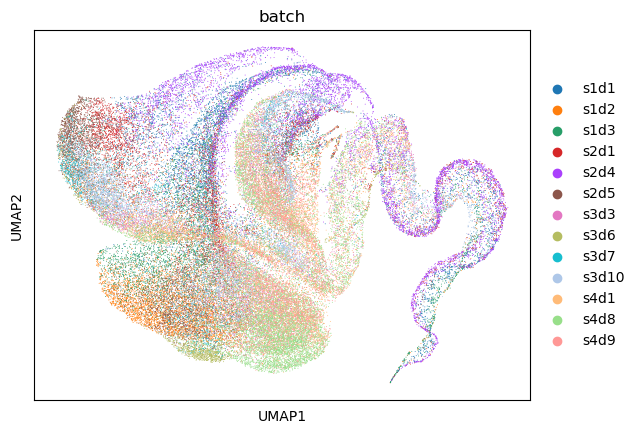

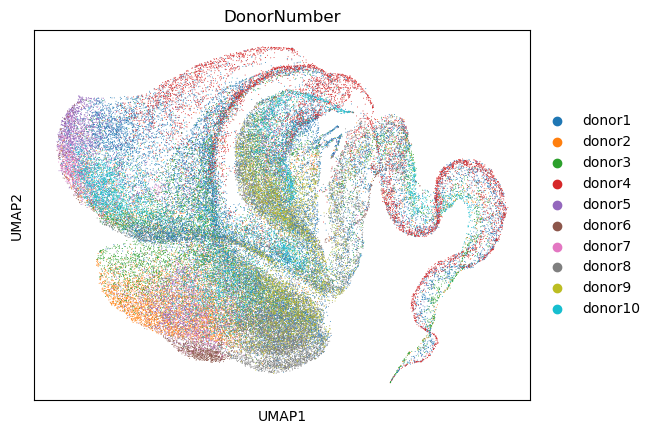

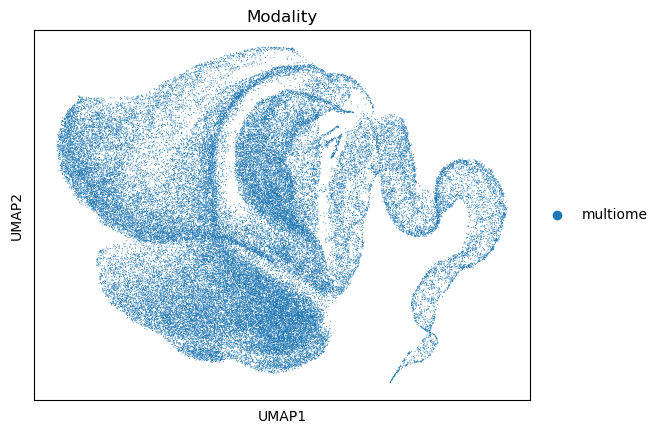

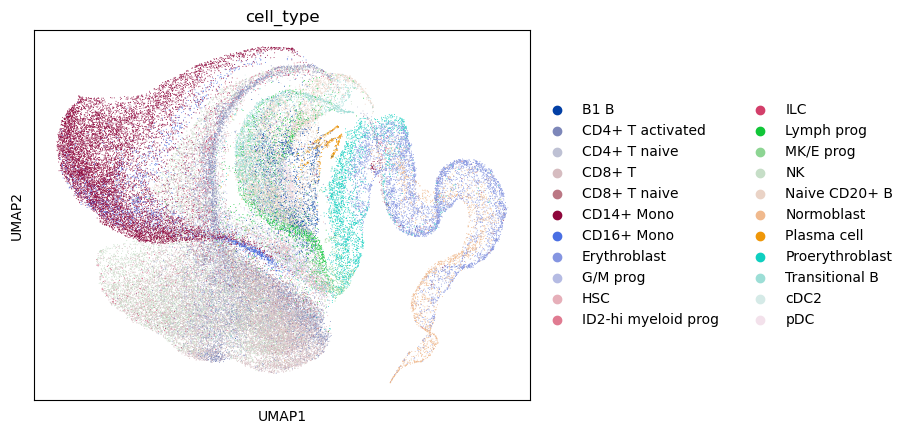

In [10]:
sc.pl.umap(gex, color="batch") # The color parameter indicates which .obs column to use for plotting
sc.pl.umap(gex, color="DonorNumber")
sc.pl.umap(gex, color="Modality")
sc.pl.umap(gex, color="cell_type")

From here we can see that the technical effects in the data aren't too bad, but the data is quite tricky in the sense that the cell-types are not that well separated! One of the goals to think of for method development might be how to better separate these cell-types in a latent space. Incorporating information from the other modality (chromatin accessibility) will definitely help as well (which is in essense the point of the multi-modal integration task).

Now let's take a look at the chromatin accessibility data. This data has >110k **binarized** features, indicating the presence or absence of a chromatin accessibility peak in each cell in the dataset. 

There's many different ideas on how to possibly do dimensionality reduction and visualization for this, and we'll use the **episcanpy** library for this, which has functions dedicated to chromatin accessibility data.

Let's go ahead and import the library and do dimensionality reduction and visualization of the data. Many of these steps are analogs of single-cell RNA sequencing data dimensionality reduction. The key aspect in your method development phase will be to either leverage these methods for reduction or come up with your own. At the very least, I would recommend using the **feature-selection** steps to reduce the dimensionality of the chromatin accessibility data. 

In [11]:
import episcanpy as esc 

In [12]:
atac = multiome[:, multiome.var["feature_types"] == "ATAC"] # Subset all data, not just the counts 
esc.pp.select_var_feature(atac, nb_features=10000, show=False, copy=False) # Feature-selection - most variable features
esc.pp.lazy(atac) # This 'lazy' function does the PCA, neighbor embedding, and UMAP steps all in one 

Trying to set attribute `.var` of view, copying.


Now let's go ahead and plot the ATAC feature dimensionality reduced data with respect to the above covariates

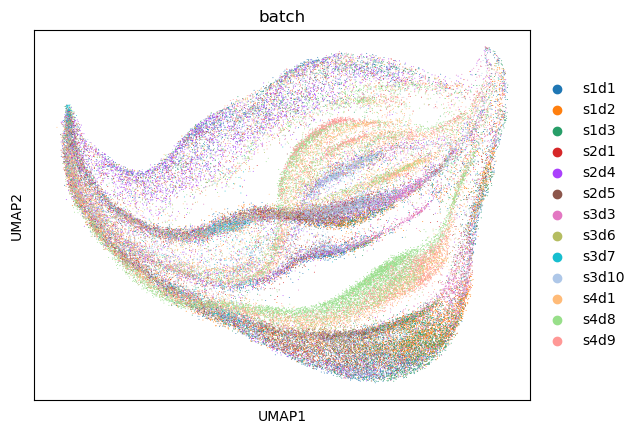

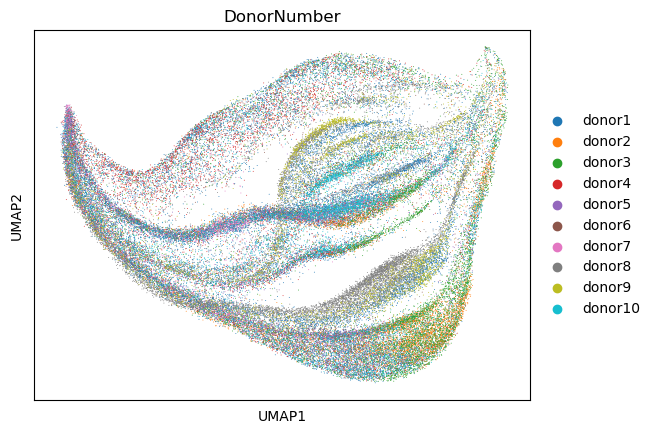

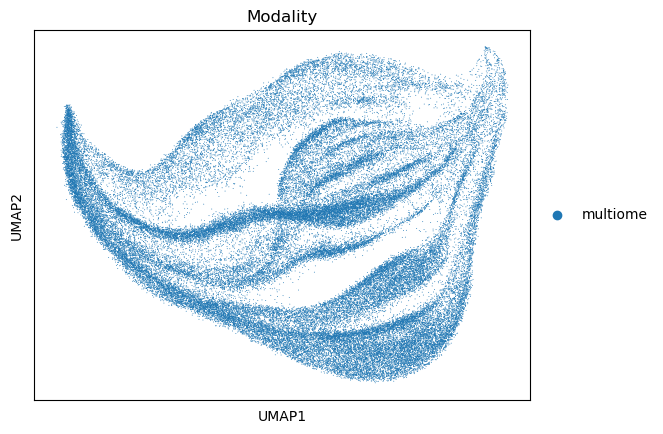

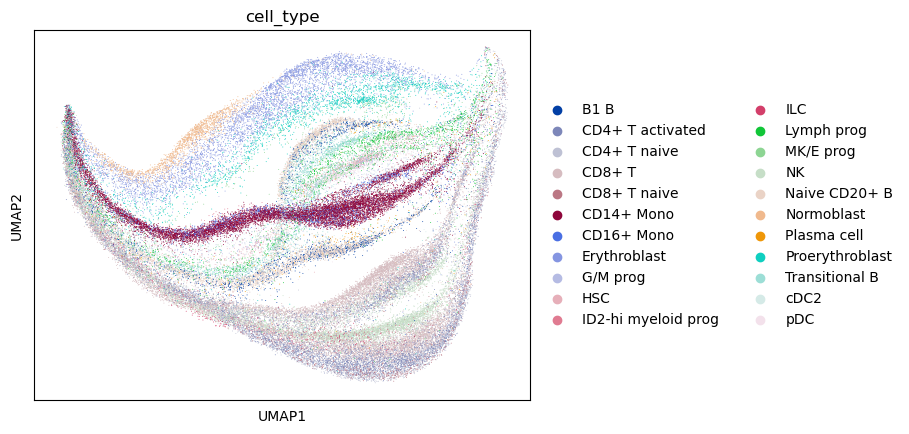

In [13]:
sc.pl.umap(atac, color="batch") # The color parameter indicates which .obs column to use for plotting
sc.pl.umap(atac, color="DonorNumber")
sc.pl.umap(atac, color="Modality")
sc.pl.umap(atac, color="cell_type")

As we can see, both modalities capture different levels of information with respect to the cell-types (classes) that we want to annotate. Our goal will be to combine information from both in a manner that best reflects the classes based on clustering (**chalkboard example here if needed**), as well as minimizes technical effects due to site of collection. 

Feel free to explore the data more on your own. For ideas on how to get started with a method and direction, I recommend reading about contrastive learning - here's a great primer by the great Lilian Weng (https://lilianweng.github.io/posts/2021-05-31-contrastive/). 